In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 54.4 MB/s eta 0:00:00


In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from keras import models
from keras import optimizers
from keras import Input
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

import pickle

In [4]:
df = pd.read_csv("Solubility.csv")

In [5]:
df

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,G1,392.510,...,17,142,0,0,0,0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,169.183,...,0,62,2,0,1,3,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,G1,140.569,...,1,46,1,0,0,1,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,G1,756.226,...,10,264,6,0,0,6,120.72,323.755434,2.320000e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,G1,422.525,...,12,164,2,4,4,6,56.60,183.183268,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,G1,264.369,...,8,106,1,0,0,1,41.57,115.300645,2.394548e+00,374.236894
9978,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,G1,444.440,...,2,170,1,0,3,4,181.62,182.429237,2.047922e+00,1148.584975
9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,1,60,1,0,0,1,20.23,67.685405,3.092720e+00,251.049732
9980,I-93,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,G1,454.611,...,13,180,2,0,0,2,63.95,198.569223,2.023333e+00,938.203977


In [ ]:
# train model

In [6]:
# prepare features
y = df['Solubility'].to_numpy()
X = df[['MolWt','MolLogP','MolMR','HeavyAtomCount','NumHAcceptors','NumHDonors','NumHeteroatoms',
    'NumRotatableBonds','NumValenceElectrons','NumAromaticRings','NumSaturatedRings','NumAliphaticRings','RingCount','TPSA',
    'LabuteASA','BalabanJ','BertzCT']]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)

# scale inputs
scaler = StandardScaler()
X_train_std=scaler.fit_transform(np.array(X_train))
X_test_std=scaler.transform(np.array(X_test))

In [7]:
import pickle

with open('X_scaler.pkl', 'wb+') as f:
  pickle.dump(scaler, f)

In [8]:
def scoremodel(y_train, y_pred_train, y_test, y_pred_test, verbose=False):
  '''
    Returns performance metrics of model as dict of form:
    {'train':[train_r2,train_rmse],'test':[test_r2,test_rmse]}
  '''
  train_r2 = metrics.r2_score(y_train, y_pred_train)
  train_rmse = metrics.mean_squared_error(y_train, y_pred_train, squared=False)
  test_r2 = metrics.r2_score(y_test, y_pred_test)
  test_rmse = metrics.mean_squared_error(y_test, y_pred_test, squared=False)
  if verbose:
    print("Training Set Metrics:")
    print(f"\tR^2: {train_r2}\n\tRMSE: {train_rmse}")
    print("Test Set Metrics:")
    print(f"\tR^2: {test_r2}\n\tRMSE: {test_rmse}")
  return {"train":[train_r2,train_rmse],"test":[test_r2,test_rmse]}

In [9]:
def NNRegressor(X_tr, X_tst=[], y_tr=[], y_tst=[], neurons=[64,32], activation_fun='elu',lr=0.01, batch_size=32):
  name = f"{'_'.join(str(n) for n in neurons)}_{activation_fun}_{lr}_{batch_size}"
  callbacks_list = [
    EarlyStopping(
        monitor="loss",
        mode='min',
        patience=100,
    ),
    ModelCheckpoint(
        filepath=f"models/{name}.h5",
        monitor="loss",
        save_best_only=True,
    )
  ]
  model = Sequential(name=name)
  # hidden layers
  model.add(Dense(neurons[0], input_dim = X_train.shape[1], activation=activation_fun, kernel_initializer='glorot_uniform'))
  model.add(BatchNormalization())
  for dim in neurons[1:]:
    model.add(Dense(dim, activation=activation_fun, kernel_initializer='glorot_uniform'))
    model.add(BatchNormalization())
  model.add(Dense(1, activation='linear'))

  model.compile(loss='MSE',
              optimizer = optimizers.Adam(learning_rate=lr),#The optimizer you will use
              metrics=['MSE']
              )

  history = model.fit(X_tr,
          y_tr, # The x and y training data to fit to
          batch_size = batch_size, # Neural network batch size, default is 32
          epochs = 500, # Number of epochs to train for
          callbacks=callbacks_list,
          verbose = 0
          )

  # score model
  if len(X_tst)==0:
    y_pred_train = model.predict(X_tr, verbose = 0)
    train_r2 = metrics.r2_score(y_tr, y_pred_train)
    train_rmse = metrics.mean_squared_error(y_tr, y_pred_train, squared=False)
    print("Training Set Metrics:")
    print(f"\tR^2: {train_r2}\n\tRMSE: {train_rmse}")
    return {"train":[train_r2,train_rmse]}
  y_pred_test = model.predict(X_tst, verbose = 0)
  y_pred_train = model.predict(X_tr, verbose = 0)
  return scoremodel(y_tr, y_pred_train, y_tst, y_pred_test, verbose=True)

In [10]:
results = {}

In [ ]:
# learning rate: 0.001, 0.01, 0.1
# neurons: [64,32], [32, 16], [128, 64]
  # [256,128, 64], [128, 64, 32]
# batch size: 16, 32, 64
# activation fun: elu, relu

In [11]:
learning_rate = [0.0001, 0.001, 0.01, 0.1]
for lr in learning_rate:
  print(lr)
  results[f"64_32_elu_{lr}_32"] = NNRegressor(X_train_std, X_test_std, y_train, y_test, lr=lr)

0.0001


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Set Metrics:
	R^2: 0.773125412441798
	RMSE: 1.1249676541148788
Test Set Metrics:
	R^2: 0.7584911990341622
	RMSE: 1.1758426764710799
0.001


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Set Metrics:
	R^2: 0.8428419758376036
	RMSE: 0.9363007884320766
Test Set Metrics:
	R^2: 0.7783285376371222
	RMSE: 1.126516691121801
0.01


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Set Metrics:
	R^2: 0.8221821823370176
	RMSE: 0.9959436042320959
Test Set Metrics:
	R^2: 0.73423835647219
	RMSE: 1.2334708433701524
0.1


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Set Metrics:
	R^2: -5864.480143373403
	RMSE: 180.88347530392397
Test Set Metrics:
	R^2: 0.7303941726952271
	RMSE: 1.2423597570875993


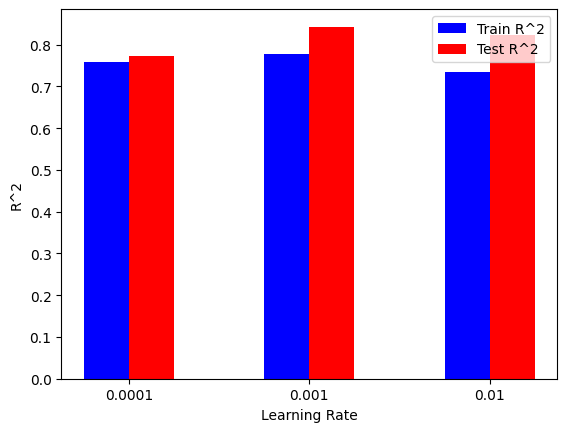

In [14]:
train_r2 = [results[f"64_32_elu_{lr}_32"]['test'][0] for lr in [0.0001, 0.001, 0.01]]
test_r2 = [results[f"64_32_elu_{lr}_32"]['train'][0] for lr in [0.0001, 0.001, 0.01]]
plt.bar([1, 2, 3], train_r2, width = -0.25, align = 'edge', color = 'blue', label = 'Train R^2')
plt.bar([1, 2, 3], test_r2, width = 0.25, align = 'edge', color = 'red', label = 'Test R^2')
plt.ylabel('R^2')
plt.xlabel('Learning Rate')
plt.xticks([1, 2, 3], ['0.0001', '0.001', '0.01'])
plt.legend()
plt.show()

In [15]:
# search neural network architectures
neurons = [[32, 16], [128, 64]]
for n_arch in neurons:
  print(n_arch)
  results[f"{'_'.join(str(n) for n in n_arch)}_elu_0.001_32"] = NNRegressor(X_train_std, X_test_std, y_train, y_test, neurons=n_arch, lr=0.001)

[32, 16]


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Set Metrics:
	R^2: 0.8166579754949488
	RMSE: 1.0112956062003262
Test Set Metrics:
	R^2: 0.7753730903281084
	RMSE: 1.1340014995672754
[128, 64]


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Set Metrics:
	R^2: 0.859649615178775
	RMSE: 0.8848179265387283
Test Set Metrics:
	R^2: 0.7774200726492093
	RMSE: 1.1288227041877608


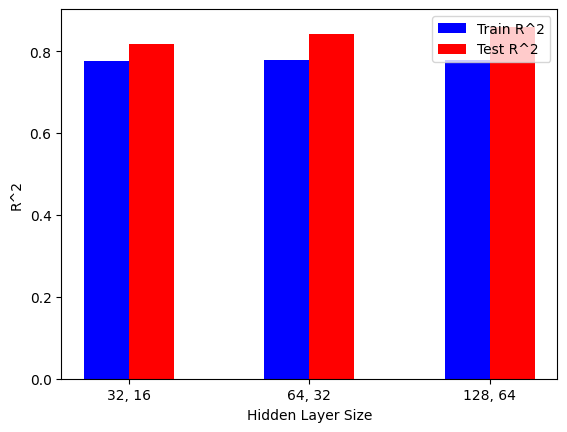

In [16]:
train_r2 = [results[f"{'_'.join(str(n) for n in n_arch)}_elu_0.001_32"]['test'][0] for n_arch in [[32, 16], [64,32], [128, 64]]]
test_r2 = [results[f"{'_'.join(str(n) for n in n_arch)}_elu_0.001_32"]['train'][0] for n_arch in [[32, 16],[64,32], [128, 64]]]
plt.bar([1, 2, 3], train_r2, width = -0.25, align = 'edge', color = 'blue', label = 'Train R^2')
plt.bar([1, 2, 3], test_r2, width = 0.25, align = 'edge', color = 'red', label = 'Test R^2')
plt.ylabel('R^2')
plt.xlabel('Hidden Layer Size')
plt.xticks([1, 2, 3], ['32, 16','64, 32', '128, 64'])
plt.legend()
plt.show()

In [17]:
neurons = [[256, 128, 64], [128, 64, 32]]
for n_arch in neurons:
  print(n_arch)
  results[f"{'_'.join(str(n) for n in n_arch)}_elu_0.001_32"] = NNRegressor(X_train_std, X_test_std, y_train, y_test, neurons=n_arch, lr=0.001)

[256, 128, 64]


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Set Metrics:
	R^2: 0.9319242723803453
	RMSE: 0.6162305926986098
Test Set Metrics:
	R^2: 0.7924074073848034
	RMSE: 1.0901560369339738
[128, 64, 32]


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Set Metrics:
	R^2: 0.8986583194857309
	RMSE: 0.7518672357826727
Test Set Metrics:
	R^2: 0.7799508471131547
	RMSE: 1.1223868975601157


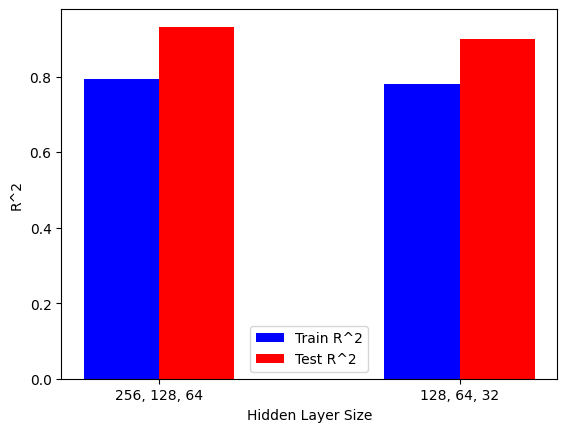

In [18]:
train_r2 = [results[f"{'_'.join(str(n) for n in n_arch)}_elu_0.001_32"]['test'][0] for n_arch in [[256, 128, 64], [128, 64, 32]]]
test_r2 = [results[f"{'_'.join(str(n) for n in n_arch)}_elu_0.001_32"]['train'][0] for n_arch in [[256, 128, 64], [128, 64, 32]]]
plt.bar([1, 2], train_r2, width = -0.25, align = 'edge', color = 'blue', label = 'Train R^2')
plt.bar([1, 2], test_r2, width = 0.25, align = 'edge', color = 'red', label = 'Test R^2')
plt.ylabel('R^2')
plt.xlabel('Hidden Layer Size')
plt.xticks([1, 2], ['256, 128, 64', '128, 64, 32'])
plt.legend()
plt.show()

In [19]:
neurons = [[256, 128, 64, 32], [128, 64, 32, 16]]
for n_arch in neurons:
  print(n_arch)
  results[f"{'_'.join(str(n) for n in n_arch)}_elu_0.001_32"] = NNRegressor(X_train_std, X_test_std, y_train, y_test, neurons=n_arch, lr=0.001)

[256, 128, 64, 32]


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Set Metrics:
	R^2: 0.94384899629546
	RMSE: 0.5596620654372924
Test Set Metrics:
	R^2: 0.8027039925609236
	RMSE: 1.0627763613098935
[128, 64, 32, 16]


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Set Metrics:
	R^2: 0.915295852149194
	RMSE: 0.687384045725252
Test Set Metrics:
	R^2: 0.7851433269981375
	RMSE: 1.1090654110652884


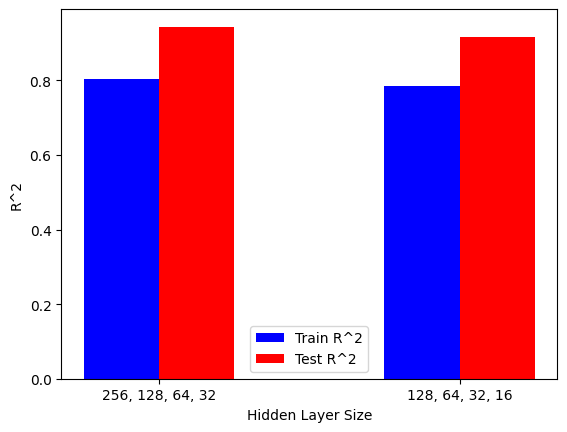

In [20]:
train_r2 = [results[f"{'_'.join(str(n) for n in n_arch)}_elu_0.001_32"]['test'][0] for n_arch in [[256, 128, 64, 32], [128, 64, 32, 16]]]
test_r2 = [results[f"{'_'.join(str(n) for n in n_arch)}_elu_0.001_32"]['train'][0] for n_arch in [[256, 128, 64, 32], [128, 64, 32, 16]]]
plt.bar([1, 2], train_r2, width = -0.25, align = 'edge', color = 'blue', label = 'Train R^2')
plt.bar([1, 2], test_r2, width = 0.25, align = 'edge', color = 'red', label = 'Test R^2')
plt.ylabel('R^2')
plt.xlabel('Hidden Layer Size')
plt.xticks([1, 2], ['256, 128, 64, 32', '128, 64, 32, 16'])
plt.legend()
plt.show()

In [21]:
batch_sizes = [16, 64, 128]
for bs in batch_sizes:
  print(bs)
  results[f"256_128_64_32_elu_0.001_{bs}"] = NNRegressor(X_train_std, X_test_std, y_train, y_test, neurons=[256, 128, 64, 32], lr=0.001, batch_size=bs)

16


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Set Metrics:
	R^2: 0.8937919850948322
	RMSE: 0.7697075647868652
Test Set Metrics:
	R^2: 0.7805099627571448
	RMSE: 1.1209600726927003
64


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Set Metrics:
	R^2: 0.9501175409821032
	RMSE: 0.5274982658817869
Test Set Metrics:
	R^2: 0.7831733447713869
	RMSE: 1.1141382204100285
128


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Set Metrics:
	R^2: 0.9597212002154043
	RMSE: 0.4740076705128421
Test Set Metrics:
	R^2: 0.7852472962918619
	RMSE: 1.1087970398326352


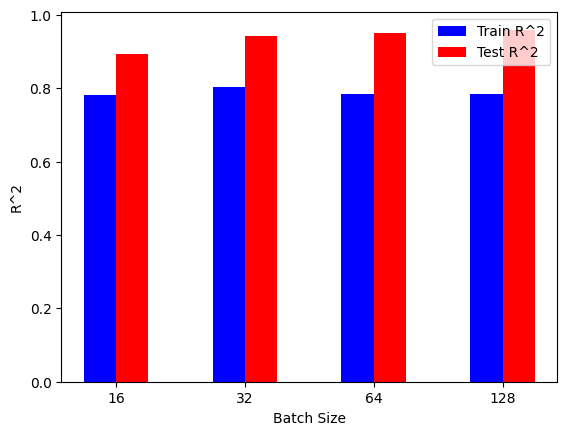

In [25]:
train_r2 = [results[f"256_128_64_32_elu_0.001_{bs}"]['test'][0] for bs in [16, 32, 64, 128]]
test_r2 = [results[f"256_128_64_32_elu_0.001_{bs}"]['train'][0] for bs in [16, 32, 64, 128]]
plt.bar([1, 2, 3, 4], train_r2, width = -0.25, align = 'edge', color = 'blue', label = 'Train R^2')
plt.bar([1, 2, 3, 4], test_r2, width = 0.25, align = 'edge', color = 'red', label = 'Test R^2')
plt.ylabel('R^2')
plt.xlabel('Batch Size')
plt.xticks([1, 2, 3, 4], ['16', '32', '64', '128'])
plt.legend()
plt.show()

In [23]:
activation_fun = ['relu', 'selu']
for fun in activation_fun:
  print(fun)
  results[f"256_128_64_32_{fun}_0.001_32"] = NNRegressor(X_train_std, X_test_std, y_train, y_test, neurons=[256, 128, 64, 32], lr=0.001, batch_size=32, activation_fun=fun)

relu


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Set Metrics:
	R^2: 0.9471825673980944
	RMSE: 0.5427948924867138
Test Set Metrics:
	R^2: 0.7937448803398843
	RMSE: 1.0866385455976113
selu


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Set Metrics:
	R^2: 0.9361139552589012
	RMSE: 0.5969667050897121
Test Set Metrics:
	R^2: 0.7942343911427885
	RMSE: 1.0853483054119455


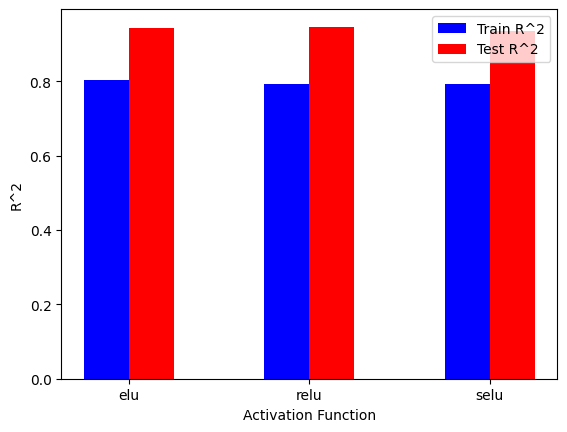

In [24]:
train_r2 = [results[f"256_128_64_32_{fun}_0.001_32"]['test'][0] for fun in ['elu', 'relu', 'selu']]
test_r2 = [results[f"256_128_64_32_{fun}_0.001_32"]['train'][0] for fun in ['elu', 'relu', 'selu']]
plt.bar([1, 2, 3], train_r2, width = -0.25, align = 'edge', color = 'blue', label = 'Train R^2')
plt.bar([1, 2, 3], test_r2, width = 0.25, align = 'edge', color = 'red', label = 'Test R^2')
plt.ylabel('R^2')
plt.xlabel('Activation Function')
plt.xticks([1, 2, 3], ['elu', 'relu', 'selu'])
plt.legend()
plt.show()

In [26]:
with open('model_results.pkl', 'wb+') as f:
  pickle.dump(results, f)

In [ ]:
def get_features_from_smi(smi, descriptors):
  '''
    Returns the rdkit descriptors for the given smiles string as a numpy array
    The descriptors returned are: [MolWt,MolLogP,MolMR,HeavyAtomCount,
    NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,
    NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,
    LabuteASA,BalabanJ,BertzCT]
  '''
  try:
    mol = Chem.MolFromSmiles(smi)
  except:
    return []
  descriptor_dict = Descriptors.CalcMolDescriptors(mol)
  features = np.array([descriptor_dict[desc] for desc in descriptors])
  return features

In [ ]:
get_features_from_smi('Clc1ccc(C=O)cc1')

array([140.569     ,   2.1525    ,  36.8395    ,   9.        ,
         1.        ,   0.        ,   2.        ,   1.        ,
        46.        ,   1.        ,   0.        ,   0.        ,
         1.        ,  17.07      ,  58.26113356,   3.00978195,
       202.6610651 ])

In [ ]:
# load model and predict
descriptors = ['MolWt','MolLogP','MolMR','HeavyAtomCount','NumHAcceptors','NumHDonors','NumHeteroatoms',
    'NumRotatableBonds','NumValenceElectrons','NumAromaticRings','NumSaturatedRings','NumAliphaticRings','RingCount','TPSA',
    'LabuteASA','BalabanJ','BertzCT']

X = df[descriptors]
# x_scaler = StandardScaler()
# X_std=x_scaler.fit_transform(X)

# best_predictive_model = load_model(f'32_16_8_elu_10x-3_64_all.h5')

with open('X_scaler.pkl', 'rb') as f:
  x_scaler = pickle.load(f)

best_predictive_model = load_model(f'models/256_128_64_32_elu_10x-3_32.h5')

def predict_solubility(smiles):
  '''
    Predicts the solubility of the given molecule described by smi,
    returns "invalid smi" if RDKit is unable to get a molecule from the smiles string
  '''
  pred = []
  all_smi_X = []
  for smi in smiles:
    smi_X = get_features_from_smi(smi, descriptors)
    if len(smi_X) == 0:
      return "invalid smi"
    all_smi_X.append(smi_X)
  all_smi_X_std = x_scaler.transform(np.array(all_smi_X))
  y_pred = best_predictive_model.predict(all_smi_X_std)
  return y_pred

In [ ]:
predict_solubility('Clc1ccc(C=O)cc1')

1/1 [==============================] - 0s 15ms/step


-2.3301709

(array([   4.,   11.,  124.,  538.,  738., 1478., 2382., 2612., 1561.,
         534.]),
 array([-13.1719    , -11.64094184, -10.10998368,  -8.57902551,
         -7.04806735,  -5.51710919,  -3.98615103,  -2.45519287,
         -0.9242347 ,   0.60672346,   2.13768162]),
 <BarContainer object of 10 artists>)

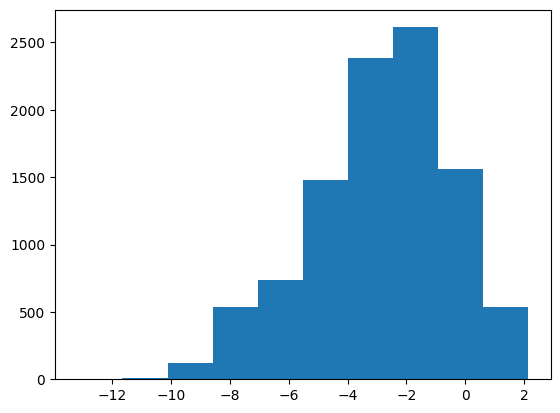

In [ ]:
plt.hist(df['Solubility'])

In [ ]:
classification_df = pd.read_csv('solubility_classification.csv')

In [ ]:
len(classification_df)

9982

In [ ]:
len(df)

9982

In [ ]:
soluble_df = df.loc[classification_df['Solubility'] == 1]
np.array(soluble_df['Solubility']).min()

-2.618046836

In [ ]:
insoluble_df = df.loc[classification_df['Solubility'] == 0]
np.array(insoluble_df['Solubility']).max()

-2.6183